# Proyecto Sprint 6 | Ice | Carlos Vallejo

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

## Instrucciones Para Completar el Proyecto

### Paso 1. Abre el archivo de datos y estudia la información general 

Ruta de archivo:

/datasets/games.csv . Descarga el dataset - https://practicum-content.s3.us-west-1.amazonaws.com/datasets/games.csv

### Paso 2. Prepara los datos

- Reemplaza los nombres de las columnas (ponlos en minúsculas).
- Convierte los datos en los tipos necesarios.
- Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.
- Si es necesario, elige la manera de tratar los valores ausentes:
    - Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.
    - ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.
    - Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.
- Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

### Paso 3. Analiza los Datos

- Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?
- Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las - plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
- Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.
- Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.
- ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.
- Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.
- Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.
- Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.
- Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

### Paso 4. Crea un perfil de usuario para cada región

Para cada región (NA, UE, JP) determina:

- Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
- Los cinco géneros principales. Explica la diferencia.
- Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

### Paso 5. Prueba las siguientes hipótesis:

- Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
- Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Establece tu mismo el valor de umbral alfa.

Explica:
- Cómo formulaste las hipótesis nula y alternativa.
- Qué criterio utilizaste para probar las hipótesis y por qué.

### Paso 6. Escribe una conclusión general.

**Formato**: Completa la tarea en Jupyter Notebook. Inserta el código de programación en las celdas *code* y las explicaciones de texto en las celdas *markdown*. Aplica formato y agrega encabezados.

## Descripción de Datos

— Name (Nombre)

— Platform (Plataforma)

— Year_of_Release (Año de lanzamiento)

— Genre (Género) 

— NA_sales (ventas en Norteamérica en millones de dólares estadounidenses) 

— EU_sales (ventas en Europa en millones de dólares estadounidenses) 

— JP_sales (ventas en Japón en millones de dólares estadounidenses) 

— Other_sales (ventas en otros países en millones de dólares estadounidenses) 

— Critic_Score (máximo de 100) 

— User_Score (máximo de 10) 

— Rating (ESRB)

Es posible que los datos de 2016 estén incompletos.

## Proyecto

### Importar mis librerias y mi base de datos

Primero necesito importar mis librerias, y mi base de datos.

In [542]:
import pandas as pd
import numpy as np
from scipy import stats as st
import math as mt
import seaborn as sns
import matplotlib.pyplot as plt

In [543]:
df = pd.read_csv('datasets/games.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Preparando los Datos

In [544]:
# Reemplazo los nombres de las columnas por minusculas

new_col_names = []

for column_name in df.columns:
    column_name = column_name.lower()
    new_col_names.append(column_name)

df.columns = new_col_names

df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [545]:
# Busco si tengo datos duplicados
df.duplicated().sum()

0

In [546]:
# Promedio de Datos Ausentes
df.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

#### Información General de mis Datos

Para la columna name, tengo 2 datos ausentes, por lo tanto los eliminare, lo mismo con 'year_of_release' que son 269 datos ausentes (hablamos que es el 0.16%). 

No sabemos por que no existen estos valores nulos. No sabemos si no tenemos el numero minimo de reviews para realizar el puntaje. En este caso no tenemos la información para saber el por que tenemos estos datos ausentes.

Para los datos de critic_score, user_score y rating, es posible que esos datos no los tengamos por que se pide una cantidad minima de reviews para poder dar un dato, de cualquier forma creo es mas conveniente imputar. Si es valor númerico, podría usar valor extremo (9999 o -9999) o bien dejarlo en 0. Si es categorico puedo representar la ausencia con "Ausente" o algo asi.

Otra opcion seria aplicar **Imputación Condicionada por Subgrupos**, ejemplo seria agrupar por plataforma, ver el año promedio de los juegos de esa plataforma e imputar mis valores con ese año.

#### Mi Approach para limpiar los datos y procesarlos

Para poder convertir mis datos a el tipo correcto:  
* Mi columna de 'year_of_release' esta en float, pero al ser año es preferible tenerla como un int, ya que no hay algo como años con punto decimal. Para esto usare dropna para quitar valores ausentes y luego la pasare a int.
* Mi columna user_score lleva tbd, que significa to be determined, es por eso que esta como tipo object. Para poder limpiar los datos puedo imputar usando un valor extremo, y pasando los tbd a este valor extremo para quedarme unicamente con floats. En caso de necesitar hacer algun calculo con necesito filtrar este valor extremo y puedo continuar. en mi caso, prefiero quedarme con los valores NaN y evitarme el paso de tener que filtrar adelante, sin contar que las herramientas como Pandas y demas ya hacen calculos con NaN sin problema.
    * Hare lo mismo con la columna 'critic_score' con la diferencia que no tienen tbd. 
* 'rating' mis valores nulos los categorizare como 'RP' que significa Rating Pending, lo cual es una categoria que ya se encuentra ahi.


In [580]:
# Drop a los valores ausentes en mi columna 'year_of_release' y luego lo paso a tipo int
df = df.dropna(subset='year_of_release')
df['year_of_release'] = df['year_of_release'].astype(int)

# Reemplazare tbd con NaN y convertire a float mi 'user_score'
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# En caso de querer imputar con un valor extremo.
# df['user_score'] = df['user_score'].replace('tbd',999)
# df['user_score'] = df['user_score'].fillna(999)

# 'rating' pasare mis valores nan a 'RP'
df['rating'] = df['rating'].fillna('RP')

# Imprimo para ver si el tipo de mis columnas cambio exitosamente
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16446 non-null  object 
 11  total_sales      16446 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


In [548]:
# Creo columna 'total_sales'
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

df.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52


### Analizando mis Datos

#### Número de Juegos Lanzados por Año
Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

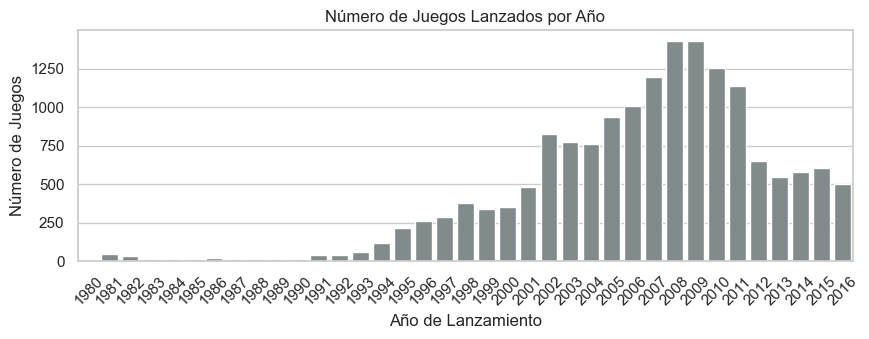

In [549]:
# Group por juegos lanzados al año
games_per_year = df.groupby('year_of_release')['name'].count().reset_index()

# Plot
plt.figure(figsize=(10, 3))
sns.barplot(
    x='year_of_release', 
    y='name', 
    data=games_per_year, 
    color='#7f8c8d'
)

# Información de mi gráfico
plt.title('Número de Juegos Lanzados por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Juegos')
plt.xticks(rotation=45)

plt.show()

Puedo ver que en los años 90's los videojuegos fueron subiendo graduaklmente, teniendo un pico en 2002 y llegando a sus máximos entre 2007-2010. Esto puede deberse a las consolas de generación teniendo un gran catalogo de juegos, cuando se empiezan a abaratar costos para producir un videojuego y vemos todo tipo de lanzamientos. Despues de estas fechas empieza a bajar. Será interesante analizar.

#### Ventas por Plataforma
Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las - plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

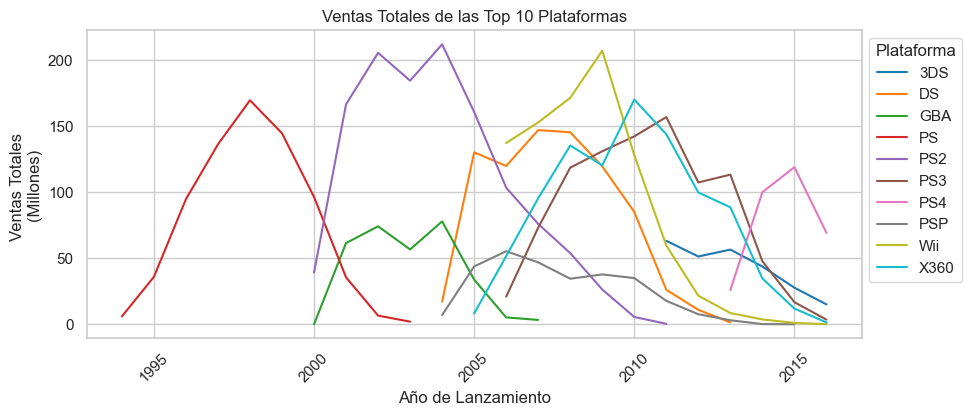

In [550]:
# Encontrar 10 plataformas con mas ventas totales
top_platforms = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10).index

# Filtrar con esas plataformas, agregue el filtro post 1990 por que DS tiene un dato erroneo con año 1985
top_platforms_df = df[(df['platform'].isin(top_platforms)) & (df['year_of_release'] >=1990)]

# Agrupar por plataforma y año
top_platforms_df = top_platforms_df.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

# Uso mi lineplot
plt.figure(figsize=(10, 4))
sns.lineplot(
    data=top_platforms_df,
    x='year_of_release',
    y='total_sales',
    hue='platform',
    palette='tab10'
)

plt.title('Ventas Totales de las Top 10 Plataformas')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales \n(Millones)')
plt.legend(title='Plataforma', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)

plt.show()

In [551]:
# Buscando el error de DS que tiene año 1985
df[df['platform']=='DS'].sort_values(by='year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.00,NaN,NaN,RP,0.02
13463,Cocoto Kart Racer,DS,2004,Racing,0.04,0.00,0.00,0.00,NaN,NaN,E,0.04
11517,Kenshuui Tendo Dokuta,DS,2004,Simulation,0.00,0.00,0.08,0.00,NaN,NaN,RP,0.08
4421,The Urbz: Sims in the City (all regions sales),DS,2004,Simulation,0.40,0.01,0.02,0.00,NaN,NaN,RP,0.43
7902,Daigasso! Band Brothers,DS,2004,Misc,0.00,0.00,0.19,0.00,NaN,NaN,RP,0.19
...,...,...,...,...,...,...,...,...,...,...,...,...
7460,Disney's Planes,DS,2013,Simulation,0.11,0.08,0.00,0.02,NaN,NaN,E,0.21
14716,LEGO Legends of Chima: Laval's Journey,DS,2013,Adventure,0.00,0.03,0.00,0.00,NaN,NaN,E10+,0.03
7993,The Smurfs 2,DS,2013,Platform,0.00,0.17,0.00,0.01,NaN,NaN,E,0.18
3862,Frozen: Olaf's Quest,DS,2013,Platform,0.21,0.26,0.00,0.04,NaN,NaN,RP,0.51


Despues de agrupar por ventas y buscar las 10 mas relevantes, y luego filtrar por esas 10 y agrupar por plataforma y año de lanzamiento con numero de ventas. Podemos ver en el gráfico "Ventas Totales de las Top 10 Plataformas" [Ya quitando el error de 1985 en Nintendo DS] que el ciclo de vida de las consolas va usualmente entre 8-10 años usualmente. La consola nueva aparece unos 2-3 años antes de que la consola en turno termine su vida, esto podria ser considerado el tiempo de transición. Tambien podemos ver que los picos de las ventas llegan usualmente despues de los 2-3 años de cuando empieza la consola, esto puede deberse a que ya la gente la compro y adopto, es decir termino el periodo de transición.

#### Datos Adicionales

- Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.
- Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.
- ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

##### Que Datos Tomar?

Para mi análisis tomare los datos de los juegos con fecha de lanzamiento despues de 2013. Esto tomando en cuenta el ciclo de los 7-10 años, asi como el overlapping entre consolas y que actualmente en el año 2016 y 2017 estamos viendo el cambio de generación. 

In [552]:
# Aplico un filtro para quitar todo lo que sea anterior a 2013
games_df = df[df['year_of_release']>=2013]
games_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,RP,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [553]:
# Encontremos las plataformas lideres en ventas para estos años
games_df['platform'].unique()

# Hago una lista con las plataformas que ya vi que van en decadencia a como dice mi gráfica
low_platforms = ['Wii',
                 'X360',
                 'DS',
                 'PS3',
                 'PSP']

In [554]:
# Creo un nuevo filtro donde quito los juegos de las plataformas cuyas ventas son practicamente nulas
games_df = games_df[~games_df['platform'].isin(low_platforms)]
games_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,RP,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,RP,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


In [555]:
# Busco las consolas potencialmente mas rentables
games_df['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PC', 'PSV'], dtype=object)

Potencialmente las consolas que se ven mas rentables para el año >2016 son el PS4, XOne, WiiU, PC. En portatiles seria el 3DS y el PSV.  
Las que mas se estan reduciendo por esos años o bien ya se estan extinguiendo son:  
- Wii
- X360
- DS
- PS3
- PSP

#### Diagrama de Cajas

Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

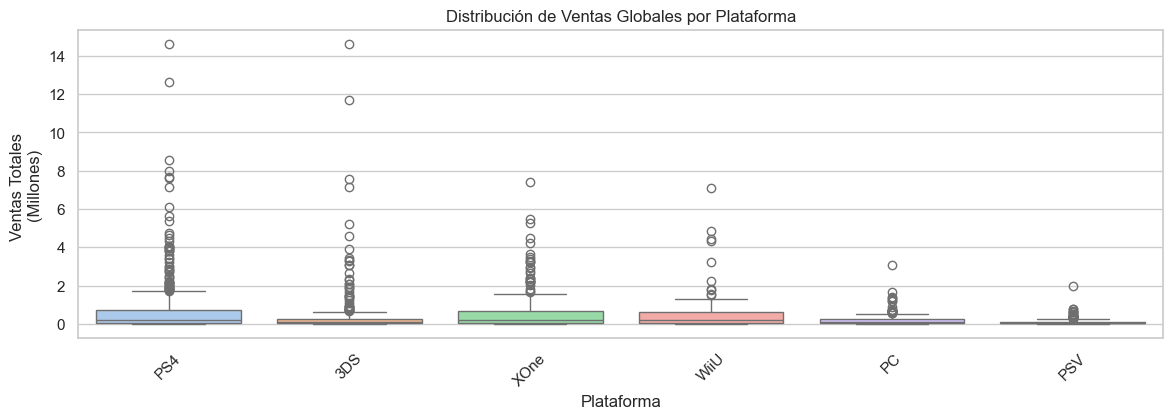

In [556]:
# Creo mi boxplot

# Settings
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 4))

# Boxplot
sns.boxplot(
    data = games_df,
    x = 'platform',
    y = 'total_sales',
    hue='platform',
    showfliers = True,
    palette='pastel'
)

# Labels y demas
plt.title('Distribución de Ventas Globales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales \n(Millones)')
plt.xticks(rotation=45)
plt.legend([], [], frameon=False)

plt.show()

Lo que podemos encontrar en este diagrama de cajas es que en su mayoria, las consolas top y en las que nos vamos a enfocar, casi todas comparten la media, y tienen distribuciones muy similares en cuestion de su catalogo. La diferencia mas grande jacta en sus "outliers", estos son los juegos que valen mas la pena de enfocarnos. Estos en su mayoría son juegos que se venden bastante bien por lo que vemos, y si nuestro enfoque es la rentabilidad, usar estos outliers son nuestra mejor opcion para tener mayores ingresos. Algo muy interesante y que no hemos mencionado hasta el momento es que los calculos los hacemos con ventas totales, pero hay juegos como GTA que son un exito en Europa y America, pero no son tan vendidos en Japon, seria interesante comparar unicamente por las regiones donde buscamos tener ventas de estos juegos.  

En resumen, hay que buscar adquirir los juegos **blockbuster** en todas las plataformas en lugar de apostar al rendimiento estandar de las ventas, ya que este tiende a ser bajo en todas las plataformas.

#### Gráficos de Dispersión

Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

In [557]:
# Busco el % de datos ausentes
games_df.groupby('platform')[['critic_score', 'user_score']].apply(lambda x: x.isna().mean())

,critic_score,user_score
platform,,
3DS,0.765677,0.735974
PC,0.211640,0.179894
PS4,0.357143,0.344388
PSV,0.784916,0.723464
WiiU,0.391304,0.304348
XOne,0.315789,0.263158


Busco el % de datos ausentes para poder elegir una consola que tenga pocos datos ausentes y ver mejor como esta la dispersion de mis datos. En este caso creo que vale la pena utilizar la mas vendida que es PS4, y PC que es la que menos datos ausentes tiene.

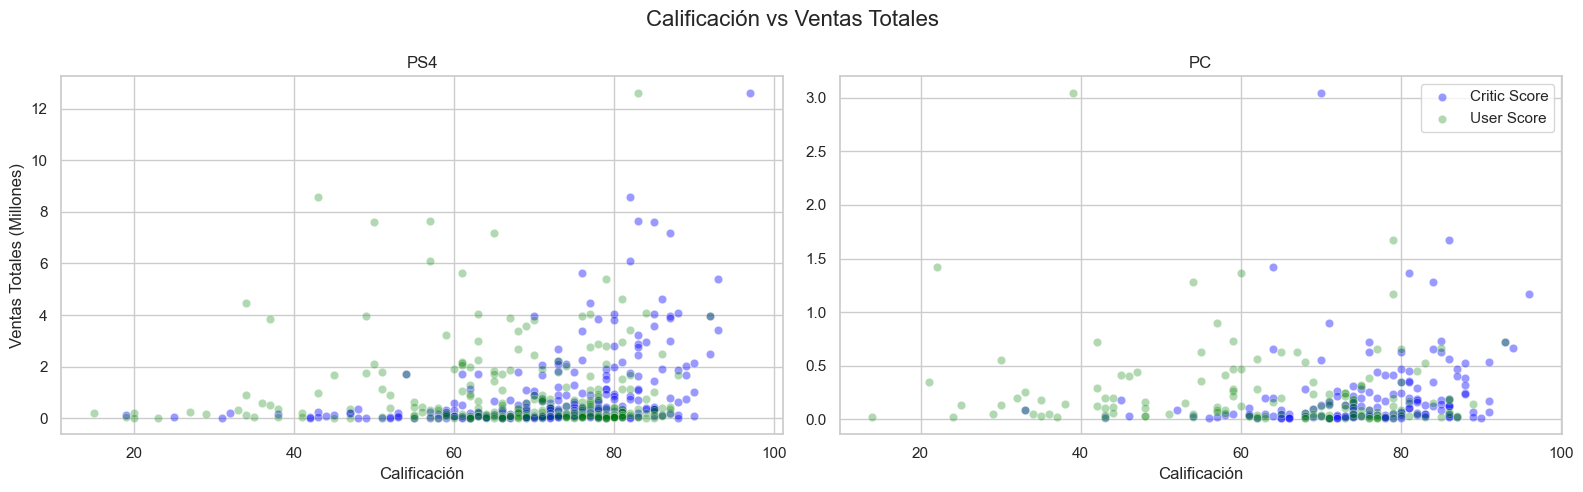

In [558]:
# Trazo los gráficos de dispersion de PS4 y PC
ps4_scatter = games_df[games_df['platform'] == 'PS4'].dropna()
ps4_scatter['user_score'] = ps4_scatter['user_score']*10
pc_scatter = games_df[games_df['platform'] == 'PC'].dropna()
pc_scatter['user_score'] = pc_scatter['user_score']*10

# Creo una figura de subplot
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Gráfica PS4
sns.scatterplot(
    data=ps4_scatter,
    x='critic_score',
    y='total_sales',
    alpha=0.4,
    label='Critic Score',
    color='blue',
    ax=axes[0]
)
sns.scatterplot(
    data=ps4_scatter,
    x='user_score',
    y='total_sales',
    alpha=0.3,
    label='User Score',
    color='green',
    ax=axes[0]
)

axes[0].set_title('PS4')
axes[0].set_xlabel('Calificación')

# Gráfica PC
sns.scatterplot(
    data=pc_scatter,
    x='critic_score',
    y='total_sales',
    alpha=0.4,
    label='Critic Score',
    color='blue',
    ax=axes[1]
)
sns.scatterplot(
    data=pc_scatter,
    x='user_score',
    y='total_sales',
    alpha=0.3,
    label='User Score',
    color='green',
    ax=axes[1]
)

axes[1].set_title('PC')
axes[1].set_xlabel('Calificación')
axes[0].legend_.remove()

# Etiqueta del eje Y solo en el primer gráfico
axes[0].set_ylabel('Ventas Totales (Millones)')
axes[1].set_ylabel('')

# Título general
fig.suptitle('Calificación vs Ventas Totales', fontsize=16)

# Ajustar diseño para que no se sobreponga el título y la leyenda
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.tight_layout()
plt.show()


In [559]:
# Correlación entre critic_score y total_sales para PS4
ps4_corr = ps4_scatter[['critic_score', 'total_sales']].corr()

# Correlación entre user_score y total_sales para PS4
ps4_user_corr = ps4_scatter[['user_score', 'total_sales']].corr()

# Correlación entre critic_score y total_sales para PC
pc_corr = pc_scatter[['critic_score', 'total_sales']].corr()

# Correlación entre user_score y total_sales para PC
pc_user_corr = pc_scatter[['user_score', 'total_sales']].corr()

print("Correlación PS4 (Critic Score vs Ventas):", ps4_corr.loc['critic_score', 'total_sales'])
print("Correlación PS4 (User Score vs Ventas):", ps4_user_corr.loc['user_score', 'total_sales'])
print("Correlación PC (Critic Score vs Ventas):", pc_corr.loc['critic_score', 'total_sales'])
print("Correlación PC (User Score vs Ventas):", pc_user_corr.loc['user_score', 'total_sales'])

Correlación PS4 (Critic Score vs Ventas): 0.40589480145836615
Correlación PS4 (User Score vs Ventas): -0.033624975965287976
Correlación PC (Critic Score vs Ventas): 0.19412407903473208
Correlación PC (User Score vs Ventas): -0.10923502736171824


Podemos ver que en general hay correlaciones debiles, un poco mas fuerte la correlacion de Critic Score en PS4, pero sigue siendo una correlación muy debil. Es decir a medida que la calificacion suibe, las ventas tienden a aumentar un poco, sin embargo no aumentan como uno lo esperaría.

#### Ventas en Otras Plataformas
Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

In [560]:
# Busco los juegos 10 juegos mas vendidos que se encuentran en distintas plataformas
duplicated_games = games_df[games_df['name'].duplicated(keep=False)]

top_multiplatform_games = duplicated_games.groupby('name')['total_sales'].sum().sort_values(ascending=False).reset_index()
top_multiplatform_games = top_multiplatform_games['name'].head(10)

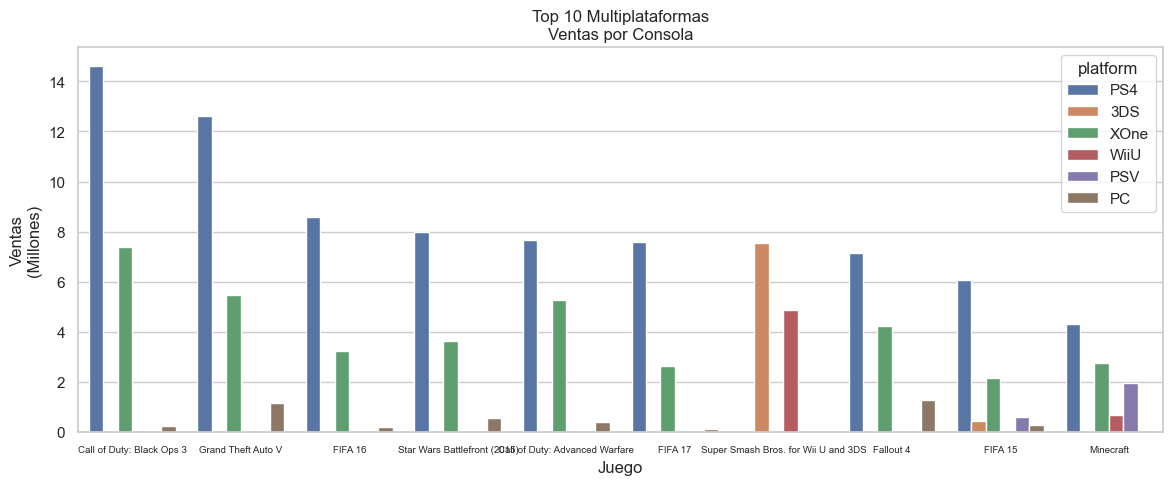

In [561]:
# Barplot de los juegos mas vendidos en multiples plataformas

# Hago mi df
top_multiplatform_df = duplicated_games[duplicated_games['name'].isin(top_multiplatform_games)]

# Gráfico de barras
plt.figure(figsize=(14, 5))
sns.barplot(
    data=top_multiplatform_df, 
    x='name', 
    y='total_sales', 
    hue='platform'
)
plt.xticks(fontsize=7)
plt.title("Top 10 Multiplataformas\nVentas por Consola")
plt.ylabel("Ventas\n(Millones)")
plt.xlabel("Juego")
plt.show()

**Optimización de Inventario PS4:**  
A partir del análisis de las ventas desglosadas por plataforma, se observa que los títulos multiplataforma en PS4 presentan un rendimiento significativamente superior en comparación con sus versiones para Xbox One y PC. En promedio, las ventas en PS4 son aproximadamente el doble que en Xbox One y superan ampliamente las de PC. Estos datos sugieren que, desde una perspectiva de optimización de inventario, sería más eficiente asignar una mayor proporción de unidades a la versión de PS4, reduciendo los pedidos de las versiones de PC, que presentan una menor rotación.  

**Comportamiento de Exclusivos en Plataformas Nintendo:**  
Los datos reflejan que, aunque las consolas de Nintendo no compiten de manera uniforme en ventas de juegos multiplataforma, sus títulos exclusivos muestran un desempeño sobresaliente. Esto indica que las ventas en estas plataformas se concentran en IPs propias y franquicias de alta demanda, como Super Smash Bros. y otros first-party. Este comportamiento sugiere que las decisiones de inventario para Nintendo deberían enfocarse principalmente en estos títulos de alto impacto, evitando sobrecargar el stock con juegos multiplataforma de menor tracción en su ecosistema.

**Ciclo de Vida y Sustitución de Juegos Anuales:**  
Los títulos con lanzamientos anuales, como FIFA, presentan un patrón claro de obsolescencia rápida, donde la edición más reciente concentra la mayor parte de las ventas, mientras que las versiones anteriores muestran una caída abrupta en la demanda. Los datos respaldan que, en estos casos, es estratégico limitar el inventario a la edición actual, evitando acumulación de versiones desactualizadas con menor salida.  

**Rendimiento Sustentado de Juegos "permanentes"":**  
Al analizar el comportamiento de juegos como Minecraft y Grand Theft Auto V, se identifica un patrón de ventas sostenido a lo largo del tiempo, independiente de su año de lanzamiento. Estos juegos "permanentes" representan una oportunidad de inversión estable, con rotación continua y menor riesgo de obsolescencia. La recomendación sería asegurar disponibilidad constante de estos títulos, priorizándolos como inventario de fondo.

#### Ventas por Género
Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [562]:
# Agrupo por genero y ventas totales
genre_sales = games_df.groupby('genre').agg(
    total_sales = ('total_sales','sum'),
    game_count=('name','count')
).reset_index()
genre_sales['average_sales'] = genre_sales['total_sales'] / genre_sales['game_count']
genre_sales

,genre,total_sales,game_count,average_sales
0,Action,199.18,568,0.350669
1,Adventure,16.48,169,0.097515
2,Fighting,26.69,48,0.556042
3,Misc,34.66,112,0.309464
4,Platform,34.22,55,0.622182
5,Puzzle,3.13,16,0.195625
6,Racing,30.36,60,0.506000
7,Role-Playing,123.94,228,0.543596
8,Shooter,165.71,122,1.358279
9,Simulation,19.81,50,0.396200


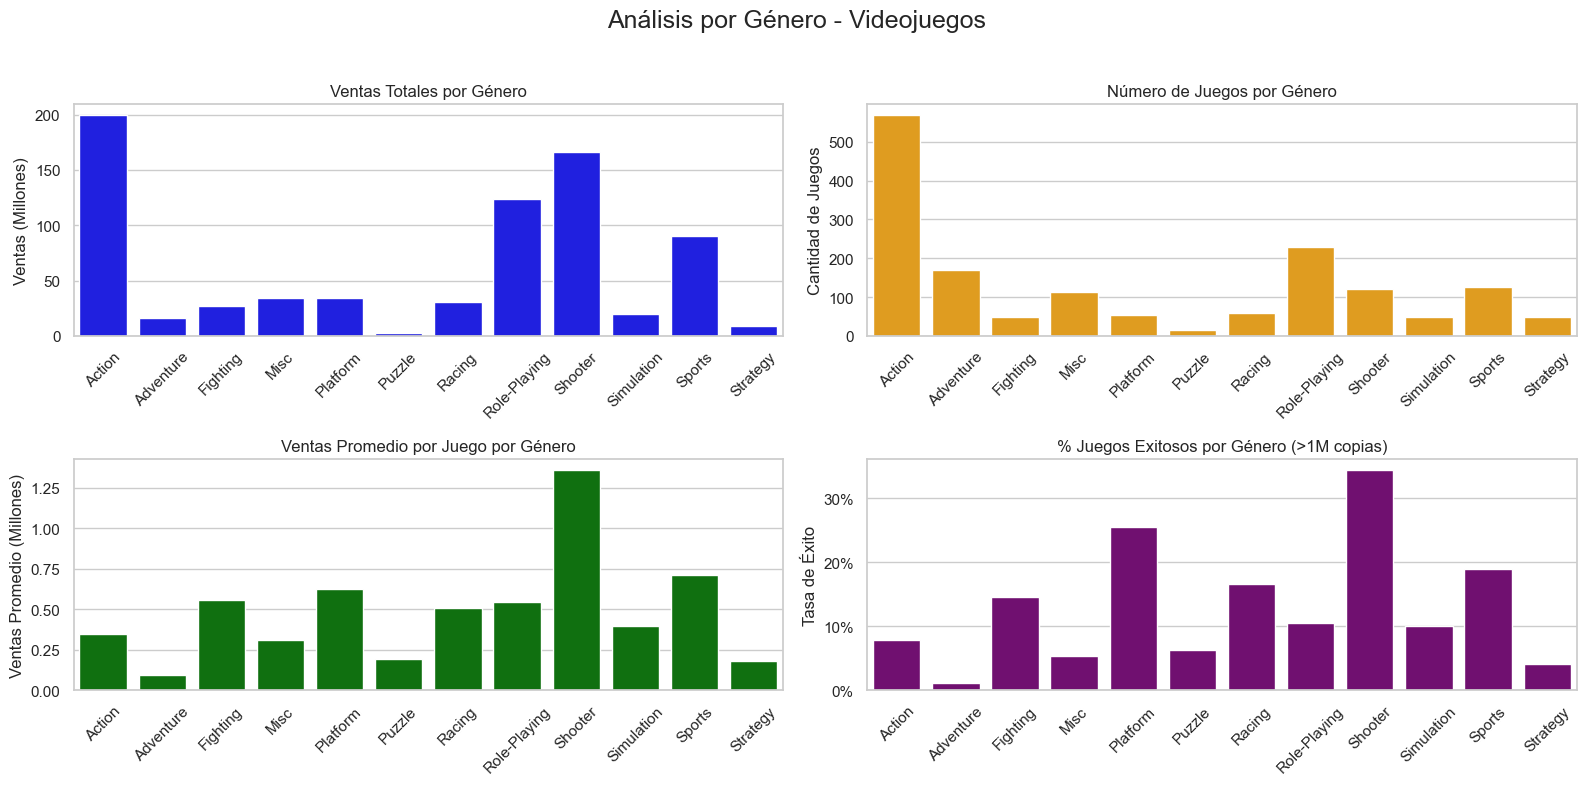

In [563]:
# Calculo la tasa de éxito (>1M copias) por género
games_df['is_successful'] = games_df['total_sales'] > 1
success_rate = games_df.groupby('genre')['is_successful'].mean().reset_index()
success_rate.rename(columns={'is_successful': 'success_rate'}, inplace=True)

# Combino la tasa de éxito con el dataframe genre_sales
genre_sales = genre_sales.merge(success_rate, on='genre', how='left')

# Creo una figura con subplots (2x2)
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

# Ventas Totales por Género
sns.barplot(
    data=genre_sales,
    x='genre',
    y='total_sales',
    color='blue',
    ax=axes[0, 0]
)
axes[0, 0].set_title('Ventas Totales por Género')
axes[0, 0].set_ylabel('Ventas (Millones)')
axes[0, 0].set_xlabel('')
axes[0, 0].tick_params(axis='x', rotation=45)

# Número de Juegos por Género
sns.barplot(
    data=genre_sales,
    x='genre',
    y='game_count',
    color='orange',
    ax=axes[0, 1]
)
axes[0, 1].set_title('Número de Juegos por Género')
axes[0, 1].set_ylabel('Cantidad de Juegos')
axes[0, 1].set_xlabel('')
axes[0, 1].tick_params(axis='x', rotation=45)

# Ventas Promedio por Juego por Género
sns.barplot(
    data=genre_sales,
    x='genre',
    y='average_sales',
    color='green',
    ax=axes[1, 0]
)
axes[1, 0].set_title('Ventas Promedio por Juego por Género')
axes[1, 0].set_ylabel('Ventas Promedio (Millones)')
axes[1, 0].set_xlabel('')
axes[1, 0].tick_params(axis='x', rotation=45)

# % de Juegos Exitosos por Género (>1M copias)
sns.barplot(
    data=genre_sales,
    x='genre',
    y='success_rate',
    color='purple',
    ax=axes[1, 1]
)
axes[1, 1].set_title('% Juegos Exitosos por Género (>1M copias)')
axes[1, 1].set_ylabel('Tasa de Éxito')
axes[1, 1].set_xlabel('')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))

# Título general
fig.suptitle('Análisis por Género - Videojuegos', fontsize=18)

# Ajusto diseño para que no se solapen los títulos
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

Los géneros más rentables son **Shooter, Platform, Sports, Racing y Fighting**, ya que no solo tienen un promedio de ventas alto por juego, sino que también presentan una mayor proporción de títulos exitosos (más de 1 millón de copias). Por otro lado, Acción, aunque lidera en ventas totales, lo hace por la alta cantidad de juegos lanzados, pero su promedio de ventas por juego es bajo, lo que sugiere más riesgo. En general, los géneros con ventas altas suelen estar ligados a franquicias fuertes y juegos de alto presupuesto, mientras que los de ventas bajas son más variados y de menor impacto comercial.

### Perfiles de Usuario por Regiones

Para cada región (NA, UE, JP) determina:

- Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
- Los cinco géneros principales. Explica la diferencia.
- Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

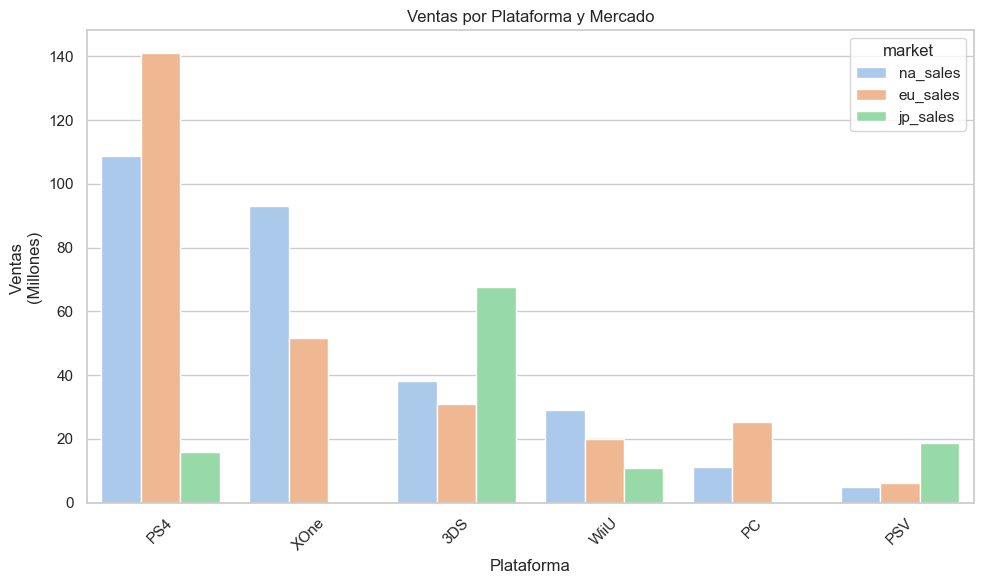

In [564]:
# Grafico
sales_per_market = games_df.groupby('platform')[['na_sales','eu_sales','jp_sales']].sum().sort_values(by='na_sales', ascending = False).reset_index()

# Transformamos el dataframe a formato largo para seaborn
sales_melted = sales_per_market.melt(id_vars='platform', var_name='market', value_name='sales')

# Configuramos estilo pastel en seaborn
sns.set_style('whitegrid')
sns.set_palette('pastel')

# Graficamos
plt.figure(figsize=(10, 6))
sns.barplot(
    data=sales_melted,
    x='platform',
    y='sales',
    hue='market'
)

plt.title('Ventas por Plataforma y Mercado')
plt.xlabel('Plataforma')
plt.ylabel('Ventas \n(Millones)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**PS4**  
PS4 domina el mercado americano y el europeo con una proporcion de 2 a 1 practicamente. Lo que la convierte en la plataforma mas relevante y de menor riesgo para invertir en inventario.

**XOne**  
El Xbox One tiene ventas fuertes en norte america, buena venta en europa, pero se podría decir que su impacto en mercados de japone es practicamente inexistente.

**3DS**  
Se ve que tiene un exito rotundo en Japón, 3DS se posiciona como el lider en Gaming Portatil, colocandose muy superior al PSVita.  

**Otros y Conclusiones**
- PC Tiene bastante mas impactop en europa que en norteamerica. 
- El mercado japones tiene una fuerte inclinacion en preferencia por el gaming portatil, lo vemos claramente por como se comportan sus ventas y que las consolas con mas ventas en japon son tanto 3DS como PSV.
- El dominio del PS4 sobre el XOne es gigante. 
- Wii U es la consola de casa con menos ventas en esta generación, a su vez es la que cuenta con mas juegos exclusivos.

/var/folders/n_/c8gqs6bs2gn57l9_60ss831w0000gn/T/ipykernel_47713/166511050.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/n_/c8gqs6bs2gn57l9_60ss831w0000gn/T/ipykernel_47713/166511050.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/n_/c8gqs6bs2gn57l9_60ss831w0000gn/T/ipykernel_47713/166511050.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


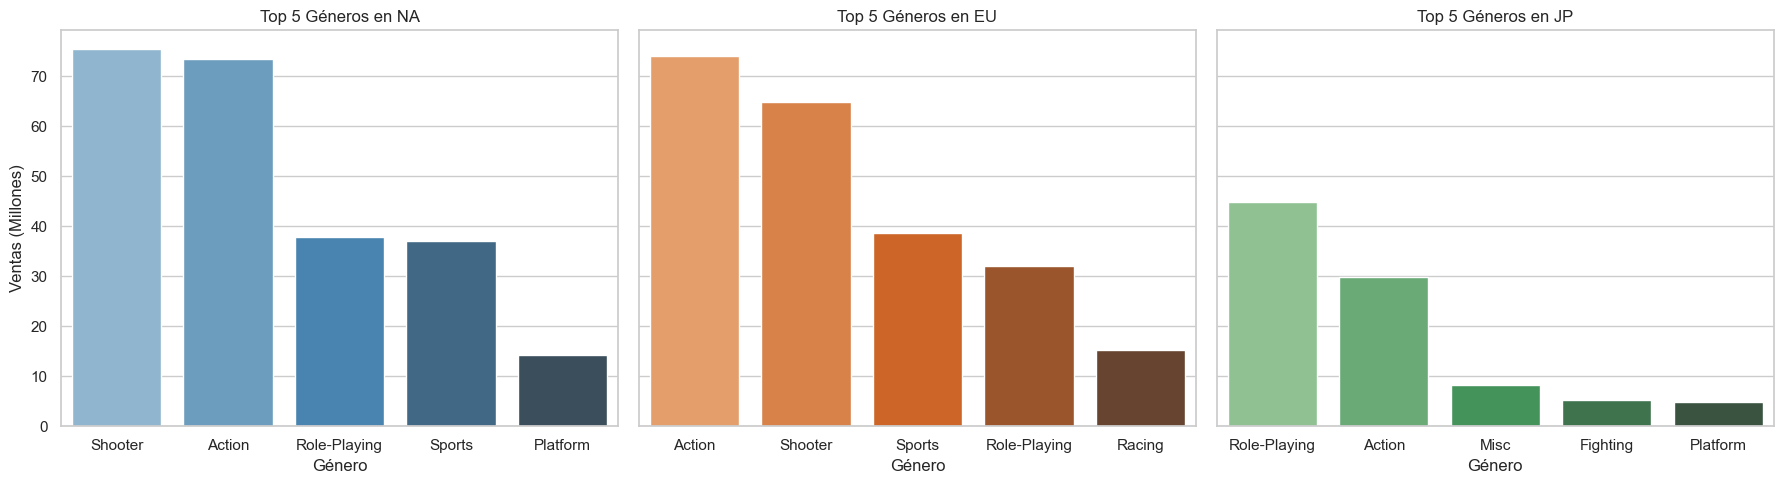

In [565]:
# Agrupo las ventas por género
genre_sales = games_df.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Ordeno por cada región y obtengo los 5 principales
top_na_genres = genre_sales['na_sales'].sort_values(ascending=False).head(5).reset_index()
top_eu_genres = genre_sales['eu_sales'].sort_values(ascending=False).head(5).reset_index()
top_jp_genres = genre_sales['jp_sales'].sort_values(ascending=False).head(5).reset_index()


# Configuro el espacio para 3 gráficas
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Gráfico NA
sns.barplot(
    ax=axes[0],
    data=top_na_genres,
    x='genre',
    y='na_sales',
    palette='Blues_d'
)
axes[0].set_title('Top 5 Géneros en NA')
axes[0].set_xlabel('Género')
axes[0].set_ylabel('Ventas (Millones)')

# Gráfico EU
sns.barplot(
    ax=axes[1],
    data=top_eu_genres,
    x='genre',
    y='eu_sales',
    palette='Oranges_d'
)
axes[1].set_title('Top 5 Géneros en EU')
axes[1].set_xlabel('Género')
axes[1].set_ylabel('')

# Gráfico JP
sns.barplot(
    ax=axes[2],
    data=top_jp_genres,
    x='genre',
    y='jp_sales',
    palette='Greens_d'
)
axes[2].set_title('Top 5 Géneros en JP')
axes[2].set_xlabel('Género')
axes[2].set_ylabel('')

# Ajustar para que no se encimen las etiquetas
plt.tight_layout()
plt.show()

A partir de estas graficas podemos ver lo siguiente:

**NA y EU**  
Comparten gustos por genero, estos generos siendo:
- Shooter
- Accion
- RPG
- Sports
Con una diferencia en su 5to favorito siendo Plataformas para NA y Racing para EU.

**JP**
El mercado de japón es bastante diferencte, teniendo dominio los juegos RPG, seguido de accion, misc, fighting y plataformas.En Japon vemos que los juegos del genero Shooter no son para nada populares.

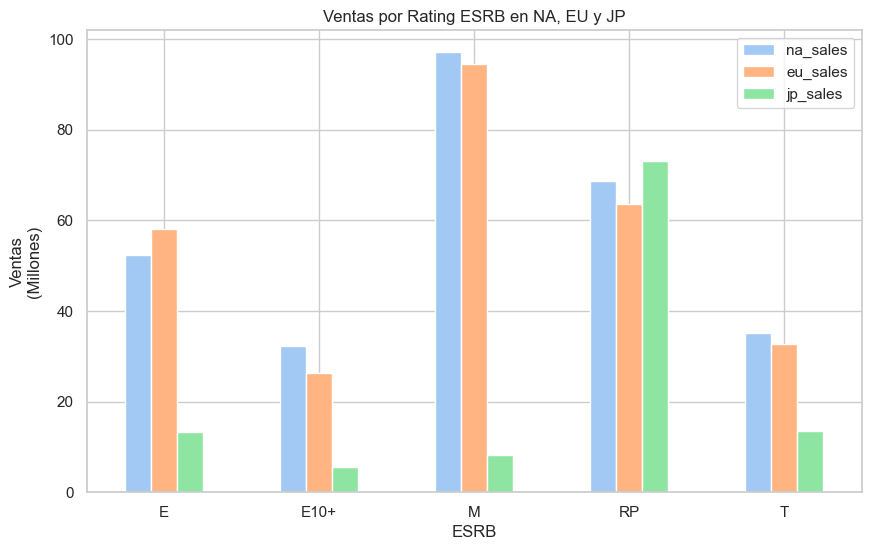

In [566]:
# Agrupo y hago mi gráfica
rating_sales = games_df.groupby('rating')[['na_sales','eu_sales','jp_sales']].sum()

rating_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Ventas por Rating ESRB en NA, EU y JP')
plt.xlabel('ESRB')
plt.ylabel('Ventas\n(Millones)')
plt.xticks(rotation=0)
plt.show()

**NA y EU**  
Dominan los juegos M y E.  


**JP**  
Hay mas diversidad y mejor distribuido, la categoria menos vendida es M, al contrario, aqui predomina E y T (sin contar RP).  

**RP**  
Es importante hacer notar que una cantidad MUY grande de datos se encuentran estos juegos que no tienen una clasificacion definitiva, lo que nos puede complicar la interpretación de nuestros datos.

### Prueba de Hipótesis

- Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
- Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Establece tu mismo el valor de umbral alfa.

Explica:
- Cómo formulaste las hipótesis nula y alternativa.
- Qué criterio utilizaste para probar las hipótesis y por qué.

In [567]:
# Creamos nuestros DF's con Query
user_avg_xone = games_df.query("platform == 'XOne'")['user_score'].dropna()
user_avg_pc = games_df.query("platform == 'PC'")['user_score'].dropna()

In [568]:
# Prueba de Levene para comprobar que mis varianzas son diferentes
stat, p = st.levene(user_avg_xone, user_avg_pc)

print(f'Estadístico: {stat}, valor p: {p}')

if p < 0.05:
    print('Las varianzas son diferentes (rechazamos H0)')
else:
    print('Las varianzas son iguales (no rechazamos H0)')

Estadístico: 8.44812129543499, valor p: 0.0038975531101304505
Las varianzas son diferentes (rechazamos H0)


In [ ]:
# Prueba de Hipotesis para XOne y PC en user_score
alpha = 0.05

# Prueba t
user_avg_results = st.ttest_ind(user_avg_xone, user_avg_pc, equal_var=False)

alpha = 0.05

print('valor p: ', user_avg_results.pvalue) 

if user_avg_results.pvalue < alpha: # Comparar el valor p con el umbral
    print('Rechazamos la hipótesis nula, hay una diferencia entre el promedio de de los usuarios de PC y XOne')
else:
    print('No podemos rechazar la hipótesis nula')

valor p:  0.14759594013430466
No podemos rechazar la hipótesis nula


Con los datos que tenemos, **no podemos rechazar la hipótesis nula**, es decir, **NO** tenemos suficiente evidencia para afirmar que existe una diferencia significativa en el promedio de user_score entre Xbox One y PC.

In [577]:
# Creamos nuestros DF's con Query
user_avg_action = games_df.query("genre == 'Action'")['user_score'].dropna()
user_avg_sports = games_df.query("genre == 'Sports'")['user_score'].dropna()

In [578]:
# Prueba de Levene para ver si nuestras varianzas son diferentes

stat, p = st.levene(user_avg_action, user_avg_sports)

print(f'Estadístico: {stat}, valor p: {p}')

if p < 0.05:
    print('Las varianzas son diferentes (rechazamos H0)')
else:
    print('Las varianzas son iguales (no rechazamos H0)')

Estadístico: 6.420102828766217, valor p: 0.011680372675250014
Las varianzas son diferentes (rechazamos H0)


In [579]:
# Prueba de Hipotesis para Accion y Sports en user_score
alpha = 0.05

# Prueba t
user_avg_genre_results = st.ttest_ind(user_avg_action, user_avg_sports, equal_var=False)

alpha = 0.05

print('valor p: ', user_avg_genre_results.pvalue) 

if user_avg_genre_results.pvalue < alpha: # Comparar el valor p con el umbral
    print('Rechazamos la hipótesis nula, hay una diferencia entre el promedio de score de los usuarios en el genero Accion y Sports')
else:
    print('No podemos rechazar la hipótesis nula')

valor p:  1.2678091455806196e-11
Rechazamos la hipótesis nula, hay una diferencia entre el promedio de score de los usuarios en el genero Accion y Sports


Con los datos que tenemos, **rechazamos la hipótesis nula.** Existe evidencia estadísticamente significativa para afirmar que el promedio de user_score para los juegos de los géneros Acción y Deportes es diferente.

### Conclusión General

Personalmente me ha gustado mucho trabajar en este proyecto, mas que conclusiones me despierta mas dudas e inquietudes. Pero en resumen recomendaria enfocar a los almacenes de la tienda ICE a adquirir diferentes productos para distintos mercados, enfocarse as en juegos para plataformas mobiles en JP y consolas de hogar en America y Europa. Por otra parte, no es buen indicador usar el score de un juego para definir si vale la pena adquirirlo, es mas importante ver como se comporta este juegi. En su mayoria para el mercado Americano y Europeo hay que concentrarnos en adquirir juegos del genero 'Shooter' ya que estos tienen yuna tasa de exito (> 1M de ventas) del 35%, minimizando nuestro riesgo de adquirir stock de este genero, a su vez en el mercado de japón nos enfocaremos en adquirir mas juegos del genero platform y RPG ya que tienen una tasa de exito mas alta y son juegos altamente deseados en este mercado. 

Finalmente y como era de esperarse, los usuarios dan scores similares sin importar en que consola esten jugando los juegos. Por otra parte si podemos ver que los usuarios califican en promedio muy diferente los juegos de diferentes generos.